# Using LLMs as High-Level Planners for Multi-Agent Coordination

This notebook provides a step-by-step guide to customizing and interacting with the RL environment.

## For Submission
1. Fill in your code in `submit.py`. 
   - Add your code *only* in the TODO sections marked by the '#' delimiter lines. Do not modify any other parts of the script.
   - You should implement any helper functions/classes in a separate `helper.py` file and import them in `submit.py`.
1. Submit `out.log` and `results.csv` generated by the `submit.py` script.


In [18]:
# Import necessary libraries and modules
import gymnasium as gym
import multigrid.envs
import matplotlib.pyplot as plt
from agents import AgentCollection

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Initial Plan Generation

An intial plan can be generated by the `initial_planner` by invoking it with the grid size and number of agents available.

In [19]:
from models import claude_llm as llm
from planner import PromptPlanner

{0: [MoveAction(type=<ActionType.MOVE: 'move'>, cur_x=1, cur_y=1, tar_x=3, tar_y=3), SearchAction(type=<ActionType.SEARCH: 'search'>, cur_x=3, cur_y=3, x1=1, y1=1, x2=5, y2=5), MoveAction(type=<ActionType.MOVE: 'move'>, cur_x=3, cur_y=3, tar_x=8, tar_y=3), SearchAction(type=<ActionType.SEARCH: 'search'>, cur_x=8, cur_y=3, x1=6, y1=1, x2=10, y2=5)], 1: [MoveAction(type=<ActionType.MOVE: 'move'>, cur_x=1, cur_y=1, tar_x=3, tar_y=8), SearchAction(type=<ActionType.SEARCH: 'search'>, cur_x=3, cur_y=8, x1=1, y1=6, x2=5, y2=10), MoveAction(type=<ActionType.MOVE: 'move'>, cur_x=3, cur_y=8, tar_x=8, tar_y=8), SearchAction(type=<ActionType.SEARCH: 'search'>, cur_x=8, cur_y=8, x1=6, y1=6, x2=10, y2=10)]}
{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(1))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contain

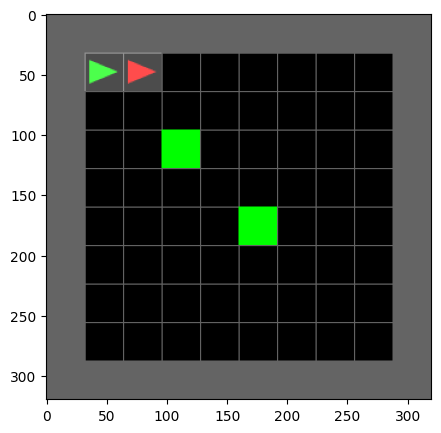

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


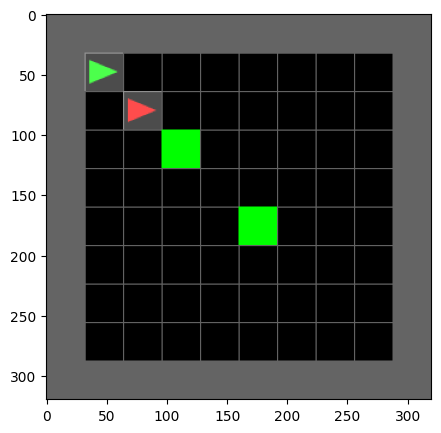

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


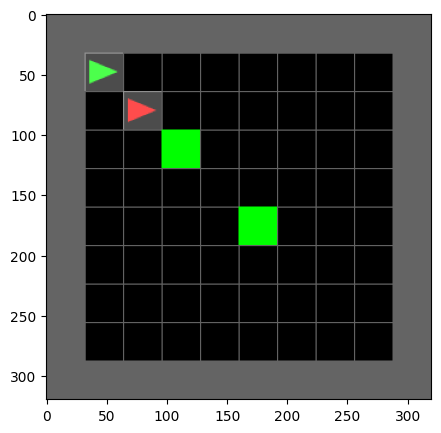

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


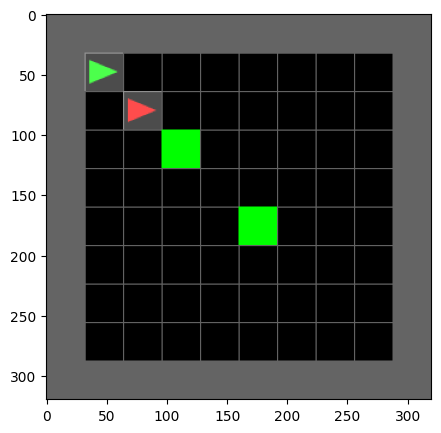

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


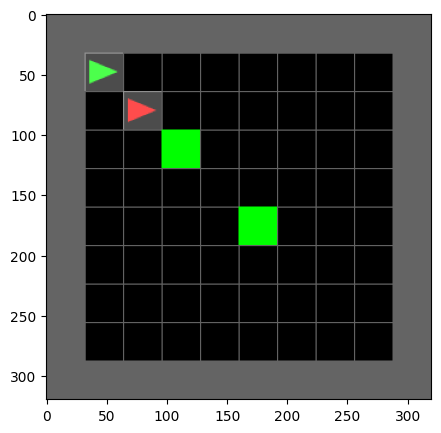

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


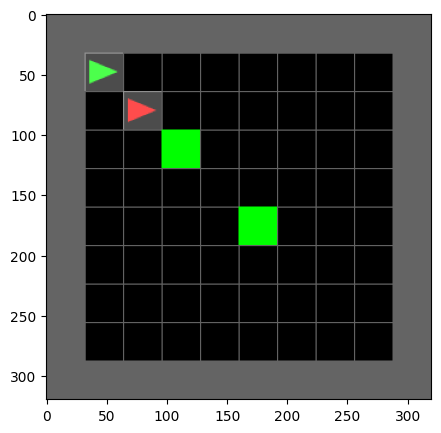

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


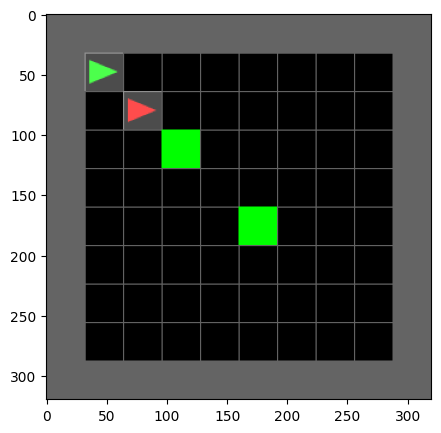

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


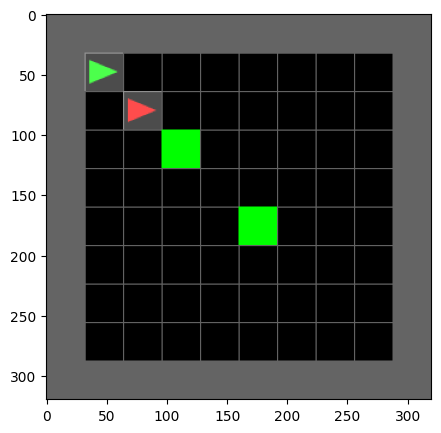

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


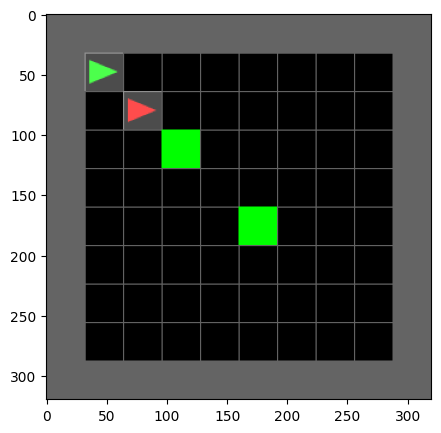

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


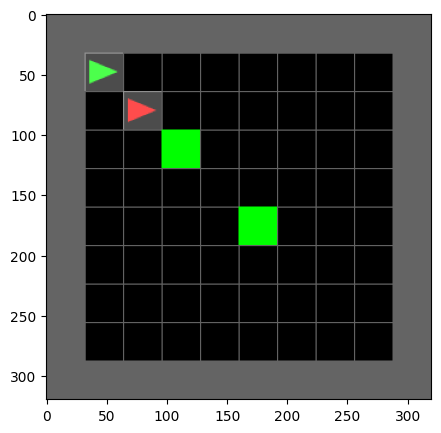

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


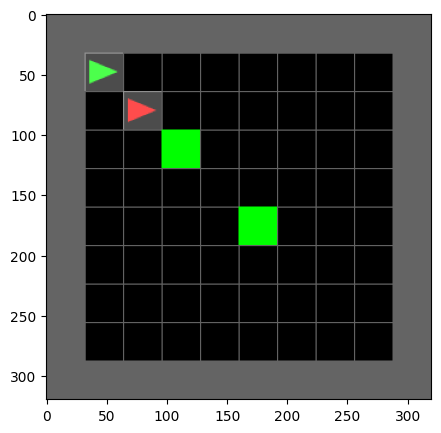

{0: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(2), np.int64(2))}, 1: {'image': array([[[1, 0, 0]]]), 'direction': np.int64(0), 'mission': Mission("All targets are contained within the region from (3, 3) to (5, 5)."), 'location': (np.int64(1), np.int64(1))}, 'global': {'num_goals': 2}}
{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


KeyboardInterrupt: 

In [ ]:
N, M = 10, 2
env = multigrid.envs.EmptyEnvV2(
    size=N,  # Specify the size of the grid, N
    agents=M,  # Specify number of agents, M
    goals=[(3, 3), (5, 5)],  # Specify target positions for agents
    mission_space="All targets are contained within the region from (3, 3) to (5, 5).",
    render_mode="rgb_array",
    hidden_goals=True,
    # max_steps=50, # For debugging, you can set a maximum number of steps
)

# Always reset the environment before starting
observations, infos = env.reset()

# Create a group of 2 agents
agents = AgentCollection(num=2)

planner = PromptPlanner(llm=llm, grid_size=N, observations=observations, infos=infos)

# Providing the agents with high-level instructions
mission = observations[0]["mission"]
plan = planner.initial_plan()
print(plan)
for agent, actions in plan.items():
    for action in actions:
        agents.tell({agent: action.serialize()})

while not agents.all_idle() and not env.unwrapped.is_done():
    # Obtain the low-level action for current time step for all agents
    a = agents.act()

    # Step the environment with the actions
    observations, rewards, terminations, truncations, infos = env.step(a)
    print(observations)
    print(a, rewards, terminations, truncations)

    plan = planner.replan(
        agents, observations, rewards, terminations, truncations, infos
    )
    for agent, actions in plan.items():
        for action in actions:
            agents.tell({agent: action.serialize()})

    # Render the environment
    img = env.render()
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()

env.close()